**Function and modules for data preparation and visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib
import sklearn

import warnings
warnings.filterwarnings('ignore')
import re
import os

**Function and modules for the supervised Classification models**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

**Function and modules for data analysis and model evaluation**

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

**Read inputs & outputs (Data)**

In [4]:
df=pd.read_csv('Breast_GSE42568.csv',)

In [5]:
df.dropna()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,191,normal,7.944225,5.256938,4.934630,6.608426,2.484290,7.019424,6.892690,4.082880,...,12.679336,12.318159,13.799560,13.587273,9.363057,6.057322,7.563571,2.368188,2.652841,2.833601
1,194,normal,8.884037,5.331575,4.904832,7.204006,2.749701,6.972236,6.070183,3.701337,...,13.634795,13.481412,14.218437,14.140858,11.468037,7.779574,9.760999,2.580490,2.857335,3.066533
2,195,normal,7.567701,5.346073,5.065426,6.974676,2.621078,7.225207,7.068959,4.021849,...,13.038809,12.717493,13.985694,13.816163,9.887965,6.594833,7.974958,2.331745,2.799020,3.011013
3,196,normal,7.683403,5.579011,4.879720,6.878121,2.508380,7.160766,6.888001,3.953837,...,11.785462,11.218846,13.182389,12.862490,8.670256,5.167771,6.751504,2.518946,2.678521,3.041044
4,197,normal,6.844834,5.675430,4.723207,6.699592,2.514456,6.851628,6.033075,4.224256,...,12.086133,11.566570,13.285725,13.044677,9.299935,5.380516,7.431685,2.430470,2.659238,3.218955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,307,tumoral,8.865190,5.420830,4.628802,6.304356,2.400503,7.466041,6.045653,3.469206,...,12.752298,12.440982,13.872615,13.575243,8.103647,4.700951,5.861282,2.442950,2.421543,2.778937
112,308,tumoral,9.200912,5.177657,4.618140,6.327677,2.463490,6.821004,5.709384,3.656983,...,12.696856,12.407032,13.861499,13.638063,9.161220,4.813848,6.999200,2.585284,2.572086,2.927002
113,309,tumoral,8.675410,5.784583,5.349351,7.107116,2.525008,7.589807,5.724006,3.657753,...,12.692024,12.316381,13.692009,13.521965,9.352961,4.681047,7.055527,2.494807,2.986089,3.062063
114,310,tumoral,10.027844,5.853110,4.904169,6.593784,2.672050,6.925438,6.128790,3.593575,...,11.822191,11.343470,13.100664,12.862788,8.922177,4.858633,6.898066,2.448368,2.672017,2.717255


In [6]:
df.type.isnull().sum()

0

<AxesSubplot:>

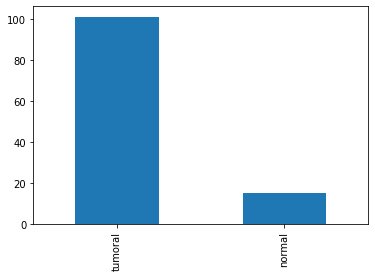

In [7]:
df['type'].value_counts().plot(kind="bar")

In [8]:
DF_RM_DUP = df.drop_duplicates()

In [9]:
dft=df.drop(columns = ['samples'])

In [10]:
dft.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,normal,7.944225,5.256938,4.934630,6.608426,2.484290,7.019424,6.892690,4.082880,6.143621,...,12.679336,12.318159,13.799560,13.587273,9.363057,6.057322,7.563571,2.368188,2.652841,2.833601
1,normal,8.884037,5.331575,4.904832,7.204006,2.749701,6.972236,6.070183,3.701337,4.895399,...,13.634795,13.481412,14.218437,14.140858,11.468037,7.779574,9.760999,2.580490,2.857335,3.066533
2,normal,7.567701,5.346073,5.065426,6.974676,2.621078,7.225207,7.068959,4.021849,5.291370,...,13.038809,12.717493,13.985694,13.816163,9.887965,6.594833,7.974958,2.331745,2.799020,3.011013
3,normal,7.683403,5.579011,4.879720,6.878121,2.508380,7.160766,6.888001,3.953837,6.011915,...,11.785462,11.218846,13.182389,12.862490,8.670256,5.167771,6.751504,2.518946,2.678521,3.041044
4,normal,6.844834,5.675430,4.723207,6.699592,2.514456,6.851628,6.033075,4.224256,6.072496,...,12.086133,11.566570,13.285725,13.044677,9.299935,5.380516,7.431685,2.430470,2.659238,3.218955


In [11]:
ord_enc = OrdinalEncoder()
dft["type"] = ord_enc.fit_transform(dft[["type"]])

In [12]:
X=dft.drop(columns = ['type'])

In [13]:
y=dft['type']
y=pd.DataFrame(y)
y

,type
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
111,1.0
112,1.0
113,1.0
114,1.0


<AxesSubplot:xlabel='type'>

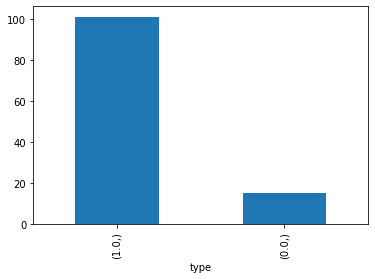

In [14]:
y.value_counts().plot(kind="bar")

# work with features as full data & classes or target for it's output

In [15]:
kfold=KFold(n_splits=10, random_state=42, shuffle=True)

# GridSearch Implementation 

## Knn

In [16]:
kn_classifier = KNeighborsClassifier()

In [17]:
param_grid_kn = {   
    'n_neighbors':[1,3,5,7,9,11,13,15],
    'weights':['uniform','distance'],
    'leaf_size':[10,30,],
}

In [18]:
kn_tuned =GridSearchCV(kn_classifier,param_grid=param_grid_kn, cv=kfold, verbose=2, n_jobs=4,scoring ="accuracy")

In [19]:
kn_tuned.fit(X, y.values.ravel())

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'leaf_size': [10, 30],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [20]:
print(kn_tuned.best_score_)
print(kn_tuned.best_params_)

0.9909090909090909
{'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}


## SVC

In [21]:
svc_classifier = SVC()

In [22]:
param_grid_svm = {
    'C': [1,5,10,15,20,.1,30],
    'gamma': [ 'scale','auto'],
    'kernel': ['rbf','linear'],
}

In [23]:
svc_tuned =GridSearchCV(svc_classifier,param_grid=param_grid_svm,verbose=2, n_jobs=4,cv=5,scoring ="accuracy"  )

In [24]:
svc_tuned.fit(X,  y.values.ravel())

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 5, 10, 15, 20, 0.1, 30],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [25]:
print(svc_tuned.best_score_)
print(svc_tuned.best_params_)

0.9916666666666668
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


# RF

In [26]:
rf_classifier = RandomForestClassifier()

In [27]:
param_grid_rf = {
    'n_estimators': [20,40,60,80,100,],
    'max_depth':[1,3,5,None],
    'criterion':['gini','entropy',],
    'max_features':['sqrt','log2',],
    'random_state':[42],
}

In [28]:
rf_tuned = GridSearchCV(
    rf_classifier, param_grid=param_grid_rf, cv=kfold, verbose=2, n_jobs=4,scoring ="accuracy" )

In [29]:
rf_tuned.fit(X,  y.values.ravel())

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [42]},
             scoring='accuracy', verbose=2)

In [30]:
print(rf_tuned.best_score_)
print(rf_tuned.best_params_)

0.9825757575757574
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 20, 'random_state': 42}


**Train Test Split :**

**we trained the features split percentages (Train: 65%, Test: 35%)**

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42,)

## KNN

In [157]:
knn=KNeighborsClassifier()

In [158]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [159]:
knn.score(X_train, Y_train) #Train Score

0.9866666666666667

In [160]:
KNNaccuracy=knn.score(X_test, Y_test) #Test Score
KNNaccuracy

1.0

In [161]:
from sklearn.metrics import classification_report
y_pred=knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        35

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



## svm

In [162]:
svc =SVC()

In [163]:
svc.fit(X_train,Y_train)

SVC()

In [164]:
svc.score(X_train, Y_train) #Train Score

0.96

In [165]:
SVCaccuracy=svc.score(X_test, Y_test) #Test Score
SVCaccuracy

1.0

In [166]:
from sklearn.metrics import classification_report
y_pred=svc.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        35

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



## RF

In [167]:
rf =RandomForestClassifier()

In [168]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [169]:
rf.score(X_train, Y_train) #Train Score

1.0

In [170]:
RFaccuracy=rf.score(X_test, Y_test) #Test Score
RFaccuracy

1.0

In [171]:
from sklearn.metrics import classification_report
y_pred=rf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        35

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



### Before Feature Selection and Parameters Tuning

[(0.0, 100.0)]

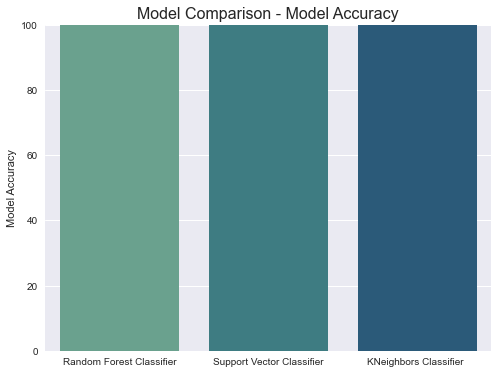

In [172]:
plt.style.use("seaborn")

xl1 = ["Random Forest Classifier",  
     "Support Vector Classifier","KNeighbors Classifier "]

yv1 = [RFaccuracy*100, 
     SVCaccuracy*100,
     KNNaccuracy*100,]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=xl1,y=yv1, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))

# Feature selection Code :

In [173]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select=SelectKBest(chi2, k=5000)
X_train_selected = select.fit_transform(X_train, Y_train)
X_test_selected= select.transform(X_test)

# Evalutaed models

### Random Forest

In [174]:
rf_evalutaed =RandomForestClassifier(**rf_tuned.best_params_)

In [175]:
rf_evalutaed.fit(X_train_selected,Y_train)

RandomForestClassifier(max_depth=1, max_features='sqrt', n_estimators=20,
                       random_state=42)

In [176]:
rf_evalutaed.score(X_train_selected, Y_train) #Train Score

1.0

In [177]:
RFTaccuracy=rf_evalutaed.score(X_test_selected, Y_test) #Test Score
RFTaccuracy

0.975609756097561

In [178]:
from sklearn.metrics import classification_report
y_pred=rf_evalutaed.predict(X_test_selected)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91         6
         1.0       0.97      1.00      0.99        35

    accuracy                           0.98        41
   macro avg       0.99      0.92      0.95        41
weighted avg       0.98      0.98      0.97        41



### SVC

In [179]:
svc_evalutaed =SVC(**svc_tuned.best_params_)

In [180]:
svc_evalutaed.fit(X_train_selected,Y_train)

SVC(C=1)

In [181]:
svc_evalutaed.score(X_train_selected, Y_train) #Train Score

0.9866666666666667

In [182]:
SVCTaccuracy=svc_evalutaed.score(X_test_selected, Y_test) #Test Score
SVCTaccuracy

1.0

In [183]:
from sklearn.metrics import classification_report
y_pred=svc_evalutaed.predict(X_test_selected)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 6  0]
 [ 0 35]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        35

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



### KNeighbors

In [184]:
knn_evalutae=KNeighborsClassifier(**kn_tuned.best_params_)

In [185]:
knn_evalutae.fit(X_train_selected,Y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=1)

In [186]:
knn_evalutae.score(X_train_selected, Y_train) #Train Score

1.0

In [187]:
KNNTaccuracy=knn_evalutae.score(X_test_selected, Y_test) #Test Score
KNNTaccuracy

1.0

In [188]:
from sklearn.metrics import classification_report
y_pred=knn_evalutae.predict(X_test_selected)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        35

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



## After Feature Selection

[(0.0, 100.0)]

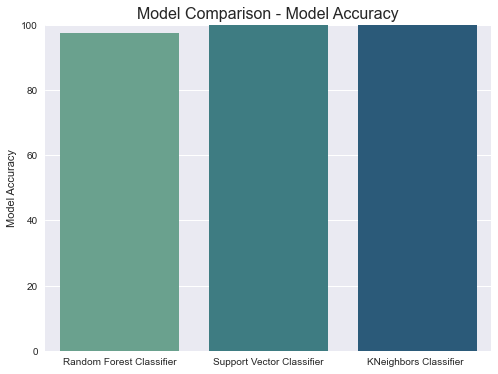

In [189]:
plt.style.use("seaborn")

x2 = ["Random Forest Classifier",  
     "Support Vector Classifier","KNeighbors Classifier "]

y2 = [RFTaccuracy*100, 
     SVCTaccuracy*100,
     KNNTaccuracy*100,]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x2,y=y2, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))

In [ ]:
from joblib import dump

dump(rf_evalutaed, './REAST_cancer_RF.joblib')
Y_test=Y_test.replace({0: 'Tumoral', 1: 'Normal'})
pd.DataFrame(Y_test).to_csv('Liver_result',)
pd.DataFrame(X_test_selected).to_csv('Liver_test',)

In [65]:
from genetic_selection import GeneticSelectionCV

selectors = GeneticSelectionCV(svc_evalutaed,
                               cv=kfold,
                               verbose=1,
                               scoring='accuracy',
                         
                               
                               n_population=60,
                               crossover_proba=0.60,
                               mutation_proba=0.2,
                               n_generations=10,
                               crossover_independent_proba=0.6,
                               mutation_independent_proba=0.06,
                               tournament_size=8,
                               caching=True,
                               n_jobs=4)
selectors = selectors.fit(X_train, Y_train)


Selecting features with genetic algorithm.
gen	nevals	avg                                        	std                                        	min                                     	max                                        
0  	60    	[     0.960714  29249.366667      0.060187]	[     0.        16601.470944      0.      ]	[    0.960714  2235.           0.060187]	[     0.960714  54631.            0.060187]
1  	29    	[    0.960714  8476.433333     0.060187]   	[    0.        6230.657296     0.      ]   	[    0.960714  2235.           0.060187]	[     0.960714  33148.            0.060187]
2  	46    	[    0.960714  3256.633333     0.060187]   	[    0.        1373.682605     0.      ]   	[    0.960714  2235.           0.060187]	[    0.960714  7672.           0.060187]   
3  	26    	[    0.960714  2706.716667     0.060187]   	[    0.        1069.441039     0.      ]   	[    0.960714  2233.           0.060187]	[    0.960714  5539.           0.060187]   
4  	41    	[    0.960714  3034.65    

In [66]:
print('Feature Selection:', X_train.columns[selectors.support_])

Feature Selection: Index(['1552299_at', '1552304_at', '1552449_a_at', '1552497_a_at',
       '1552504_a_at', '1552557_a_at', '1552566_at', '1552620_at',
       '1552641_s_at', '1552656_s_at',
       ...
       '57163_at', '58308_at', '58900_at', '60528_at', '635_s_at', '65472_at',
       '65630_at', '78047_s_at', '90265_at', 'AFFX-PheX-3_at'],
      dtype='object', length=2200)


In [67]:
selectors.score(X_train, Y_train) #Train Score

0.9866666666666667

In [68]:
selectors.score(X_test, Y_test) #Test Score

1.0

In [69]:
from sklearn.metrics import classification_report
y_pred=selectors.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 6  0]
 [ 0 35]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        35

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

